# Bar plots global means

## Div imports

load and autoreload
from IPython import get_ipython

In [ ]:
from sect_sens.constants import get_plotpath
from sect_sens.util.naming_conventions.var_info import get_fancy_var_name
from sect_sens.util.practical_functions import make_folders
from sect_sens.util.slice_average import one_val_tab
# noinspection PyBroadException
from sect_sens.util.slice_average.one_val_tab import get_mean_std_by_type
from IPython import get_ipython

try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

from useful_scit.imps import (plt, pd, sns)

import matplotlib as mpl
import numpy as np

from sect_sens.data_info import simulation_types

## Filenames

In [2]:
from sect_sens.util.plot.colors import get_case_col

version = 'clean'
plt_path = get_plotpath('one_value')


def create_filename(name):
    fn = f'{plt_path}_bar_{version}_{name}.'
    make_folders(fn)
    return fn

In [3]:
startyear = '0004-01'
endyear = '0008-12'
pmin = 850.  # minimum pressure level
avg_over_lev = True  # True#True#False#True
pressure_adjust = True  # Can only be false if avg_over_lev false. Plots particular hybrid sigma lev

## Models and variables to include:

In [4]:
varl = ['N_AER', 'NCONC01', 'TGCLDCWP', 'CDNUMC', 'NCFT_Ghan', 'DIR_Ghan', 'LWDIR_Ghan', 'SWDIR_Ghan', 'SWCF_Ghan',
        'LWCF_Ghan', 'cb_SO4_NA', 'cb_SOA_NA', 'cb_NA', 'SOA_NA', 'SO4_NA',
        'ACTNL_incld', 'ACTREL_incld', 'SFisoprene', 'SFmonoterp']
varl_ex = ['FSNT', 'FSNT_DRF', 'FLNT', 'FLNT_DRF', 'FSNTCDRF']
varl = varl + varl_ex

cases = ['SECTv21_ctrl_koagD', 'SECTv21_incY', 'SECTv21_decY', 'noSECTv21_ox_ricc_dd', 'noSECTv21_ox_ricc_decY',
         'noSECTv21_ox_ricc_incY']
cases_sec = [
    'NF1850_SECT_ctrl',
    'NF1850_aeroxid2014_SECT_ctrl',
    # 'NF1850_SECT_gord',
    # 'NF1850_aeroxid2014_SECT_gord',
]
cases_nsec = [
    'NF1850_noSECT_def',
    'NF1850_aeroxid2014_noSECT_def',
    'NF1850_aeroxid2014_noSECT_ox_ricc',
    'NF1850_noSECT_ox_ricc',
    # 'NF1850_noSECT_ox_gord',
    # 'NF1850_aeroxid2014_noSECT_ox_ricc_test_gordon',

]
# 'noSECTv21_ox_ricc_decY','noSECTv21_ox_ricc_dd','noSECTv21_ox_ricc_incY',
#               'noSECTv21_def_decY','noSECTv21_default_dd','noSECTv21_def_incY']

In [5]:
model_types = ['OsloAeroSec', 'OsloAero$_{imp}$', 'OsloAero$_{def}$'][::-1]

cdic = {key: get_case_col(key) for key in model_types}

In [6]:
trans_dic = {v: get_fancy_var_name(v) for v in varl}

In [7]:
rn_dic = {
    'NCRE$_{Ghan}$': 'ERF$_{aci}$',
    'SWCRE$_{Ghan}$': 'ERF$_{aci,SW}$',
    'LWCRE$_{Ghan}$': 'ERF$_{aci,LW}$',
    'DRE$_{Ghan}$': 'ERF$_{ari}$'

}

## Import data:

In [8]:
# varl = ['N_AER']
df2, dic_vals = one_val_tab.get_tab_yearly_mean(varl,
                                                cases_sec + cases_nsec,
                                                startyear,
                                                endyear,
                                                pmin=pmin,
                                                pressure_adjust=pressure_adjust,
                                                average_over_lev=avg_over_lev,
                                                groupby='time.year',  # 'time',
                                                dims=None,
                                                area='Global',
                                                invert_dic=True
                                                )

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['N_AER']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['NCONC01']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['TGCLDCWP']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['CDNUMC']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['NCFT_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['DIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['LWDIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['SWDIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['SWCF_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['LWCF_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['cb_SO4_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['cb_SOA_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['cb_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['SOA_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['SO4_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['ACTNL', 'FCTL']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['ACTREL', 'FCTL']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['SFisoprene']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['SFmonoterp']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['FSNT']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['FSNT_DRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['FLNT']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['FLNT_DRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['FSNTCDRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['N_AER']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['NCONC01']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['TGCLDCWP']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['CDNUMC']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['NCFT_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['DIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['LWDIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['SWDIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['SWCF_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['LWCF_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['cb_SO4_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['cb_SOA_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['cb_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['SOA_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['SO4_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['ACTNL', 'FCTL']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['ACTREL', 'FCTL']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['SFisoprene']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['SFmonoterp']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['FSNT']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['FSNT_DRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['FLNT']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['FLNT_DRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['FSNTCDRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['N_AER']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['NCONC01']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['TGCLDCWP']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['CDNUMC']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['NCFT_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['DIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['LWDIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['SWDIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['SWCF_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['LWCF_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['cb_SO4_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['cb_SOA_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['cb_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['SOA_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['SO4_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['ACTNL', 'FCTL']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['ACTREL', 'FCTL']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['SFisoprene']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['SFmonoterp']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['FSNT']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['FSNT_DRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['FLNT']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['FLNT_DRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['FSNTCDRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['N_AER']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['NCONC01']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['TGCLDCWP']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['CDNUMC']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['NCFT_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['DIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['LWDIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['SWDIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['SWCF_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['LWCF_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['cb_SO4_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['cb_SOA_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['cb_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['SOA_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['SO4_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['ACTNL', 'FCTL']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['ACTREL', 'FCTL']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['SFisoprene']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['SFmonoterp']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['FSNT']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['FSNT_DRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['FLNT']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['FLNT_DRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['FSNTCDRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['N_AER']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['NCONC01']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['TGCLDCWP']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['CDNUMC']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['NCFT_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['DIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['LWDIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['SWDIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['SWCF_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['LWCF_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['cb_SO4_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['cb_SOA_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['cb_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['SOA_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['SO4_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['ACTNL', 'FCTL']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['ACTREL', 'FCTL']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['SFisoprene']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['SFmonoterp']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['FSNT']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['FSNT_DRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['FLNT']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['FLNT_DRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['FSNTCDRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['N_AER']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['NCONC01']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['TGCLDCWP']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['CDNUMC']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['NCFT_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['DIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['LWDIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['SWDIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['SWCF_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['LWCF_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['cb_SO4_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['cb_SOA_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['cb_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['SOA_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['SO4_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['ACTNL', 'FCTL']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['ACTREL', 'FCTL']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['SFisoprene']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['SFmonoterp']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['FSNT']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['FSNT_DRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['FLNT']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['FLNT_DRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['FSNTCDRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py

## Get PI to PD difference

In [9]:
relative = False
dic_diff = simulation_types.get_diff_by_type(dic_vals, varl, case_types=['PI', 'PD'],
                                             relative=relative,
                                             mod_types=model_types,
                                             ctrl='PI'
                                             )['PD-PI']

ls = []
for key in dic_diff.keys():
    print(key)
    _df = dic_diff[key]

    _df['case'] = key
    print(_df.keys())
    ls.append(_df.reset_index())

df_tot = pd.concat(ls)
df_tot.head()

['PI', 'PD'] ['OsloAero$_{def}$', 'OsloAero$_{imp}$', 'OsloAeroSec']
subtracting NF1850_noSECT_def-NF1850_noSECT_def
subtracting NF1850_noSECT_ox_ricc-NF1850_noSECT_ox_ricc
subtracting NF1850_SECT_ctrl-NF1850_SECT_ctrl
subtracting NF1850_aeroxid2014_noSECT_def-NF1850_noSECT_def
subtracting NF1850_aeroxid2014_noSECT_ox_ricc-NF1850_noSECT_ox_ricc
subtracting NF1850_aeroxid2014_SECT_ctrl-NF1850_SECT_ctrl
OsloAero$_{def}$
Index(['N_AER', 'NCONC01', 'TGCLDCWP', 'CDNUMC', 'NCFT_Ghan', 'DIR_Ghan',
       'LWDIR_Ghan', 'SWDIR_Ghan', 'SWCF_Ghan', 'LWCF_Ghan', 'cb_SO4_NA',
       'cb_SOA_NA', 'cb_NA', 'SOA_NA', 'SO4_NA', 'ACTNL_incld', 'ACTREL_incld',
       'SFisoprene', 'SFmonoterp', 'FSNT', 'FSNT_DRF', 'FLNT', 'FLNT_DRF',
       'FSNTCDRF', 'case'],
      dtype='object')
OsloAero$_{imp}$
Index(['N_AER', 'NCONC01', 'TGCLDCWP', 'CDNUMC', 'NCFT_Ghan', 'DIR_Ghan',
       'LWDIR_Ghan', 'SWDIR_Ghan', 'SWCF_Ghan', 'LWCF_Ghan', 'cb_SO4_NA',
       'cb_SOA_NA', 'cb_NA', 'SOA_NA', 'SO4_NA', 'ACTNL_incl

,year,N_AER,NCONC01,TGCLDCWP,CDNUMC,NCFT_Ghan,DIR_Ghan,LWDIR_Ghan,SWDIR_Ghan,SWCF_Ghan,...,ACTNL_incld,ACTREL_incld,SFisoprene,SFmonoterp,FSNT,FSNT_DRF,FLNT,FLNT_DRF,FSNTCDRF,case
0,4,434.709259,300.079919,0.002995,3.228625e+09,-1.291955,0.054312,0.032076,0.022236,-1.373042,...,8.387299,-0.613504,-5.070689e-13,-8.490776e-14,-1.413460,-1.435696,-0.123241,-0.091166,-0.062654,OsloAero$_{def}$
1,5,431.407779,303.601166,0.003137,3.345147e+09,-1.210021,0.022193,0.034259,-0.012067,-1.426138,...,8.847817,-0.634824,-5.650023e-13,-1.008281e-13,-1.441189,-1.429122,-0.256326,-0.222067,-0.002984,OsloAero$_{def}$
2,6,438.680444,306.567117,0.002924,3.164700e+09,-1.343406,0.043106,0.033808,0.009298,-1.312246,...,8.438636,-0.602889,-4.640008e-13,-8.903039e-14,-1.333805,-1.343103,-0.009019,0.024789,-0.030857,OsloAero$_{def}$
3,7,444.702048,309.478158,0.002868,3.224831e+09,-1.347147,0.054872,0.032871,0.022001,-1.285128,...,8.615498,-0.603528,-5.892375e-13,-1.042230e-13,-1.274833,-1.296833,0.028172,0.061043,-0.011705,OsloAero$_{def}$
4,8,440.197858,308.338897,0.002871,3.153206e+09,-1.262313,0.023290,0.031725,-0.008435,-1.347373,...,8.786476,-0.604840,-5.862158e-13,-1.095993e-13,-1.389658,-1.381223,-0.139572,-0.107847,-0.033851,OsloAero$_{def}$


In [10]:

svarl = ['NCFT_Ghan', 'SWCF_Ghan', 'LWCF_Ghan', 'DIR_Ghan']

df1 = df_tot[[*svarl, 'case']]
df1 = df1.rename(trans_dic, axis=1)
df1 = df1.rename(rn_dic, axis=1)
df2 = pd.melt(df1, id_vars='case')

df2.groupby(['variable', 'case']).mean()

value
variable       case                      
ERF$_{aci,LW}$ OsloAero$_{def}$  0.057817
               OsloAero$_{imp}$  0.137017
               OsloAeroSec       0.060657
ERF$_{aci,SW}$ OsloAero$_{def}$ -1.348785
               OsloAero$_{imp}$ -1.437740
               OsloAeroSec      -1.221338
ERF$_{aci}$    OsloAero$_{def}$ -1.290968
               OsloAero$_{imp}$ -1.300723
               OsloAeroSec      -1.160681
ERF$_{ari}$    OsloAero$_{def}$  0.039555
               OsloAero$_{imp}$  0.036366
               OsloAeroSec       0.005702

In [11]:
cols = [cdic[c] for c in df_tot['case'].unique()]
print(cols)

['#4daf4aff', '#377eb8ff', '#ff7f00ff']


/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/one_value/_bar_clean_forcing.


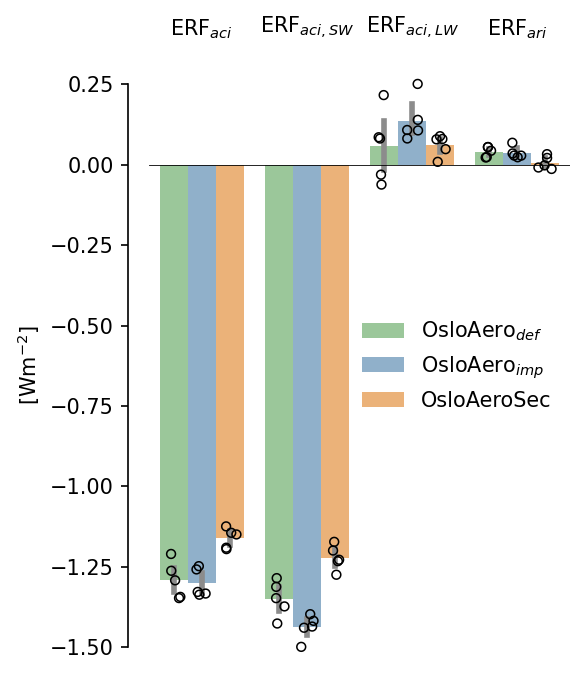

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/one_value/_bar_clean_forcing.


In [12]:

figsize = [4., 4.7]
f, ax = plt.subplots(figsize=figsize, dpi=150)

pts = np.linspace(0, np.pi * 2, 24)
circ = np.c_[np.sin(pts) / 2, -np.cos(pts) / 2]
vert = np.r_[circ, circ[::-1] * .7]
open_circle = mpl.path.Path(vert)
sns.barplot(y='value', x='variable', hue='case', data=df2, errcolor='.55', ci=90,
            palette=cols, alpha=.6)
g = sns.stripplot(y='value', x='variable', hue='case', data=df2,
                  dodge=True, marker=open_circle, palette=['none'] * 3,
                  jitter=.2, label='_nolegend_')  # , add_=False)#label='_nolabel_')

handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[3:], labels[3:], frameon=False, loc='center right')

ax.axhline(0, linewidth=0.4, c='k')
sns.despine(f, bottom=True, trim=True, offset=10)
# ax.legend(frameon=False)
plt.tick_params(
    axis='x',  # changes apply to the x-axis
    which='both',  # both major and minor ticks are affected
    bottom=False,  # ticks along the bottom edge are off
    top=False,  # ticks along the top edge are off
    labeltop=True,
    labelbottom=False
)  # labels along the bottom edge are off
ax.set_ylabel('[Wm$^{-2}$]')
ax.set_xlabel('')

fn = create_filename('forcing')
plt.tight_layout()
f.savefig(fn + 'pdf', dpi=300)
print(fn)
plt.show()

print(fn)

## Compute relative difference

In [13]:

relative = True
dic_diff = simulation_types.get_diff_by_type(dic_vals, varl, case_types=['PI', 'PD'],
                                             relative=relative,
                                             mod_types=model_types,
                                             ctrl='PI'
                                             )['(PD-PI)/PI']

ls = []
for key in dic_diff.keys():
    print(key)
    _df = dic_diff[key]

    _df['case'] = key
    print(_df.keys())
    ls.append(_df.reset_index())

df_tot = pd.concat(ls)
df_tot.head()

['PI', 'PD'] ['OsloAero$_{def}$', 'OsloAero$_{imp}$', 'OsloAeroSec']
OsloAero$_{def}$
Index(['N_AER', 'NCONC01', 'TGCLDCWP', 'CDNUMC', 'NCFT_Ghan', 'DIR_Ghan',
       'LWDIR_Ghan', 'SWDIR_Ghan', 'SWCF_Ghan', 'LWCF_Ghan', 'cb_SO4_NA',
       'cb_SOA_NA', 'cb_NA', 'SOA_NA', 'SO4_NA', 'ACTNL_incld', 'ACTREL_incld',
       'SFisoprene', 'SFmonoterp', 'FSNT', 'FSNT_DRF', 'FLNT', 'FLNT_DRF',
       'FSNTCDRF', 'case'],
      dtype='object')
OsloAero$_{imp}$
Index(['N_AER', 'NCONC01', 'TGCLDCWP', 'CDNUMC', 'NCFT_Ghan', 'DIR_Ghan',
       'LWDIR_Ghan', 'SWDIR_Ghan', 'SWCF_Ghan', 'LWCF_Ghan', 'cb_SO4_NA',
       'cb_SOA_NA', 'cb_NA', 'SOA_NA', 'SO4_NA', 'ACTNL_incld', 'ACTREL_incld',
       'SFisoprene', 'SFmonoterp', 'FSNT', 'FSNT_DRF', 'FLNT', 'FLNT_DRF',
       'FSNTCDRF', 'case'],
      dtype='object')
OsloAeroSec
Index(['N_AER', 'NCONC01', 'TGCLDCWP', 'CDNUMC', 'NCFT_Ghan', 'DIR_Ghan',
       'LWDIR_Ghan', 'SWDIR_Ghan', 'SWCF_Ghan', 'LWCF_Ghan', 'cb_SO4_NA',
       'cb_SOA_NA', 'cb_NA', 'S

,year,N_AER,NCONC01,TGCLDCWP,CDNUMC,NCFT_Ghan,DIR_Ghan,LWDIR_Ghan,SWDIR_Ghan,SWCF_Ghan,...,ACTNL_incld,ACTREL_incld,SFisoprene,SFmonoterp,FSNT,FSNT_DRF,FLNT,FLNT_DRF,FSNTCDRF,case
0,4,87.323936,96.372179,3.709459,29.484907,-5.254051,1.711710,10.569061,0.639621,-2.698576,...,24.174184,-4.470461,-1.730771,-1.255548,-0.596391,-0.597016,-0.052303,-0.038640,-0.021504,OsloAero$_{def}$
1,5,85.188512,95.779406,3.885124,30.979519,-4.923165,0.722157,11.291328,-0.357373,-2.807955,...,26.035291,-4.597039,-1.884068,-1.460618,-0.608037,-0.594478,-0.108806,-0.094142,-0.001025,OsloAero$_{def}$
2,6,87.394095,96.474307,3.622718,28.903192,-5.511103,1.398539,11.246519,0.274861,-2.586789,...,24.302649,-4.408025,-1.568214,-1.301272,-0.562080,-0.558043,-0.003831,0.010517,-0.010589,OsloAero$_{def}$
3,7,87.096866,98.858904,3.550051,29.525510,-5.474080,1.706194,10.738757,0.624637,-2.524718,...,24.886618,-4.379101,-1.966015,-1.516411,-0.538453,-0.539716,0.011958,0.025877,-0.004020,OsloAero$_{def}$
4,8,87.844868,98.555424,3.589884,29.142650,-5.183870,0.759266,10.520468,-0.250369,-2.664969,...,25.356305,-4.390270,-1.985744,-1.609040,-0.585340,-0.573646,-0.059203,-0.045688,-0.011619,OsloAero$_{def}$


### Rename and extract

In [14]:

# svarl = ['NCFT_Ghan', 'SWCF_Ghan', 'LWCF_Ghan','DIR_Ghan']
svarl = ['N_AER', 'NCONC01', 'cb_SOA_NA', 'cb_SO4_NA', 'cb_NA']
rn_dic = {
    'c.b. SOA$_{NPF}$+SO4$_{NPF}$': 'c.b. SOA$_{NPF}$ \n+ SO4$_{NPF}$',
    'c.b. SOA$_{NPF}$': 'c.b. \n SOA$_{NPF}$',
    'c.b. SO4$_{NPF}$': 'c.b. \n SO4$_{NPF}$',
}
df1 = df_tot[[*svarl, 'case']]
df1 = df1.rename(trans_dic, axis=1)
df1 = df1.rename(rn_dic, axis=1)
df2 = pd.melt(df1, id_vars='case')

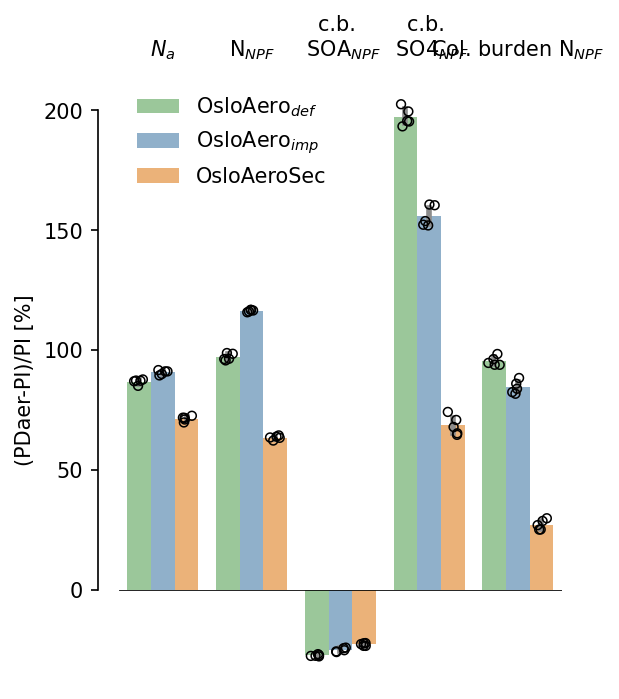

In [15]:
figsize = [5, 3]

figsize = [4.2, 4.95]
f, ax = plt.subplots(figsize=figsize, dpi=150)

pts = np.linspace(0, np.pi * 2, 24)
circ = np.c_[np.sin(pts) / 2, -np.cos(pts) / 2]
vert = np.r_[circ, circ[::-1] * .7]
open_circle = mpl.path.Path(vert)
sns.barplot(y='value', x='variable', hue='case', data=df2, errcolor='.55',
            ci=95, palette=cols, alpha=.6)
g = sns.stripplot(y='value', x='variable', hue='case', data=df2, dodge=True, marker=open_circle, palette=['none'] * 3,
                  jitter=.2, label='_nolegend_')  # , add_=False)#label='_nolabel_')

handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[3:], labels[3:], frameon=False, loc='upper left')

ax.axhline(0, linewidth=0.4, c='k')
sns.despine(f, bottom=True, trim=True, offset=10)
plt.tick_params(
    axis='x',  # changes apply to the x-axis
    which='both',  # both major and minor ticks are affected
    bottom=False,  # ticks along the bottom edge are off
    top=False,  # ticks along the top edge are off
    labeltop=True,
    labelbottom=False
)  # labels along the bottom edge are off

ax.set_ylabel('(PDaer-PI)/PI [%]')
fn = create_filename('aerosol')
plt.tight_layout()
ax.set_xlabel('')
f.savefig(fn + 'pdf', dpi=300)
plt.show()

In [16]:


# svarl = ['NCFT_Ghan', 'SWCF_Ghan', 'LWCF_Ghan','DIR_Ghan']
svarl = ['N_AER', 'NCONC01', 'cb_SOA_NA', 'cb_SO4_NA', 'cb_NA']
svarl = ['CDNUMC', 'ACTREL_incld', 'TGCLDCWP']  # 'cb_SOA_NA', 'cb_SO4_NA']

rn_dic = {
    'c.b. SOA$_{NPF}$+SO4$_{NPF}$': 'c.b. SOA$_{NPF}$ \n+ SO4$_{NPF}$',
    'c.b. SOA$_{NPF}$': 'c.b. \n SOA$_{NPF}$',
    'c.b. SO4$_{NPF}$': 'c.b. \n SO4$_{NPF}$',
}
df1 = df_tot[[*svarl, 'case']]
df1 = df1.rename(trans_dic, axis=1)
df1 = df1.rename(rn_dic, axis=1)
df2 = pd.melt(df1, id_vars='case')

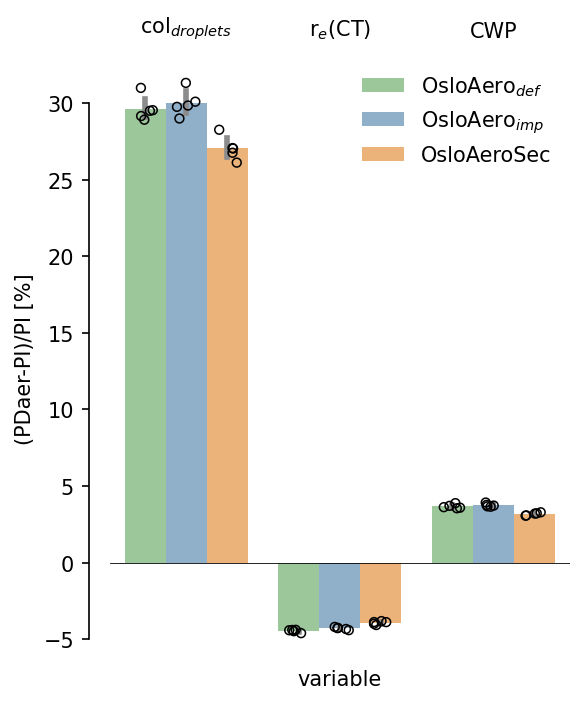

In [17]:

svarl = ['CDNUMC', 'ACTREL_incld', 'TGCLDCWP']  # 'cb_SOA_NA', 'cb_SO4_NA']
relative = True
figsize = [4., 4.8]
f, ax = plt.subplots(figsize=figsize, dpi=150)

pts = np.linspace(0, np.pi * 2, 24)
circ = np.c_[np.sin(pts) / 2, -np.cos(pts) / 2]
vert = np.r_[circ, circ[::-1] * .7]
open_circle = mpl.path.Path(vert)
sns.barplot(y='value', x='variable', hue='case', data=df2, errcolor='.55', ci=95,
            palette=cols, alpha=.6)
g = sns.stripplot(y='value', x='variable', hue='case', data=df2, dodge=True, marker=open_circle, palette=['none'] * 3,
                  jitter=.2, label='_nolegend_')  # , add_=False)#label='_nolabel_')

handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[3:], labels[3:], frameon=False, loc='upper right')

ax.axhline(0, linewidth=0.4, c='k')
sns.despine(f, bottom=True, trim=True, offset=10)
plt.tick_params(
    axis='x',  # changes apply to the x-axis
    which='both',  # both major and minor ticks are affected
    bottom=False,  # ticks along the bottom edge are off
    top=False,  # ticks along the top edge are off
    labeltop=True,
    labelbottom=False
)  # labels along the bottom edge are off

ax.set_ylabel('(PDaer-PI)/PI [%]')
fn = create_filename('cld_props')
plt.tight_layout()
f.savefig(fn + 'pdf', dpi=300)
plt.show()

In [18]:


case_types = ['PI', 'PIaerPD']
# model_types = ['OsloAeroSec$_{gord}$','OsloAeroSec','OsloAero$_{gord}$', 'OsloAero$_{imp}$', 'OsloAero$_{def}$']
model_types = ['OsloAeroSec', 'OsloAero$_{imp}$', 'OsloAero$_{def}$'][::-1]

cdic = {key: get_case_col(key) for key in model_types}  # , ['r','g','b'])}

['PI', 'PIaerPD'] ['OsloAero$_{def}$', 'OsloAero$_{imp}$', 'OsloAeroSec']
subtracting NF1850_noSECT_def-NF1850_noSECT_def
subtracting NF1850_noSECT_ox_ricc-NF1850_noSECT_ox_ricc
subtracting NF1850_SECT_ctrl-NF1850_SECT_ctrl
subtracting NF1850_aeroxid2014_noSECT_def-NF1850_noSECT_def
subtracting NF1850_aeroxid2014_noSECT_ox_ricc-NF1850_noSECT_ox_ricc
subtracting NF1850_aeroxid2014_SECT_ctrl-NF1850_SECT_ctrl


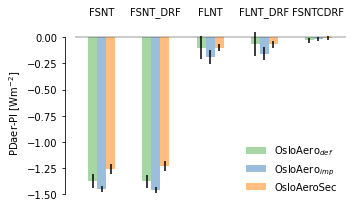

In [19]:
figsize = [5, 3]
svarl = ['FSNT', 'FSNT_DRF', 'FLNT', 'FLNT_DRF', 'FSNTCDRF']  # '', 'SWCF_Ghan', 'LWCF_Ghan','DIR_Ghan']

mean, std, mean_nn, std_nn = get_mean_std_by_type(dic_vals, svarl, case_types=['PI', 'PIaerPD'],
                                                  model_types=model_types, ctrl='PI')

fig, ax = plt.subplots(1, figsize=figsize)
mean_nn.plot.bar(alpha=0.5, ax=ax, color=[cdic[c] for c in pd.DataFrame(mean).columns],
                 yerr=std_nn)  # , colors={'OsloAeroSec':'b'})
ax.axhline(0, linewidth=0.4, c='k')
sns.despine(fig, bottom=True, trim=True, offset=10)
ax.legend(frameon=False)
plt.tick_params(
    axis='x',  # changes apply to the x-axis
    which='both',  # both major and minor ticks are affected
    bottom=False,  # ticks along the bottom edge are off
    top=False,  # ticks along the top edge are off
    labeltop=True,
    labelbottom=False
)  # labels along the bottom edge are off
ax.set_ylabel('PDaer-PI [Wm$^{-2}$]')
fn = create_filename('forcing')
plt.tight_layout()
# fig.savefig(fn+'pdf', dpi=300)
plt.show()